# ResNet (Residual Network)

### 현재 가장 우수한 이미지 분류기

In [2]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50, decode_predictions

resnet = ResNet50()
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [3]:
import cv2
import time

img = cv2.imread('images/bird1.jpg', -1)
img = cv2.resize(img, (224, 224))

start = time.time()
yhat = resnet.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 1.4052608013153076
indigo_bunting (99.61%)


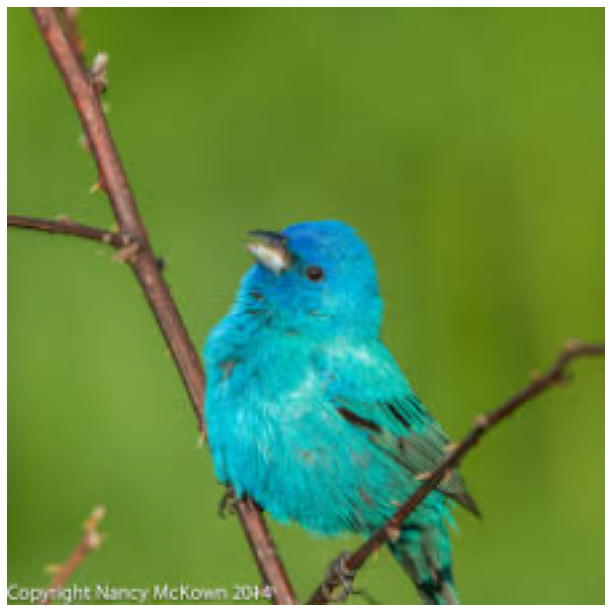

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print('테스트 시 소요 시간 : {}'.format(time))
print('%s (%.2f%%)' %(label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis('off')
plt.show()